In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection   import train_test_split
import os
import itertools
import warnings
import cv2
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
folder_path = "/content/gdrive/MyDrive/Shoe vs Sandal vs Boot Dataset"

In [4]:
#https://www.kaggle.com/code/essammohamed4320/different-approaches-for-image-classification
boot_sample = cv2.imread('/content/gdrive/MyDrive/Shoe vs Sandal vs Boot Dataset/Boot/boot (53).jpg')

sandal_sample = cv2.imread('/content/gdrive/MyDrive/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (53).jpg')

shoe_sample = cv2.imread('/content/gdrive/MyDrive/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (53).jpg')

In [5]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [6]:
boot_sample = bgr2rgb(boot_sample)
sandal_sample = bgr2rgb(sandal_sample)
shoe_sample = bgr2rgb(shoe_sample)
samples = [boot_sample, sandal_sample, shoe_sample]

In [7]:

def plot_samples(samples, cmap, use_cmap=False):
    plt.figure(figsize= (8,8))
    for i in range(1, 4):
        plt.subplot(1,3,i)
        if use_cmap:
            plt.imshow(samples[i-1], cmap=cmap)
        else:
            plt.imshow(samples[i-1])
        plt.grid(False)
    plt.show()

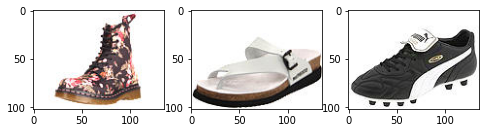

In [8]:
plot_samples(samples, None)

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
dataset=[]
lab=[]
def walk_data(folder_path):
    for (root,dirs,files) in os.walk(folder_path, topdown=False):
        for file in files:
            img = cv2.imread(root + '/' + file)
            img = cv2.resize(img, (28, 28))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.Canny(img , 90, 150)
            img = img/255
            dataset.append(img)
            lab.append(root.split('/')[-1])

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
%%time
walk_data(folder_path)

CPU times: user 13.5 s, sys: 6.21 s, total: 19.7 s
Wall time: 3min 27s


In [13]:
dataset = np.array(dataset)
new_lab = []
for i in lab:
    tmp = None
    if i == 'Shoe':
        tmp = 0
    elif i == 'Sandal':
        tmp = 1
    elif i == 'Boot':
        tmp = 2
    
    new_lab.append(tmp)
        
new_lab = np.array(new_lab)

In [14]:
i = np.random.randint(0, 15000)
j = np.random.randint(0, 15000)
k = np.random.randint(0, 15000)
samples = [dataset[i], dataset[j], dataset[k]]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(dataset, new_lab, test_size=0.3, 
                                                    shuffle=True, random_state=42)
y_train_n = tf.keras.utils.to_categorical(y_train, 3)
y_test_n = tf.keras.utils.to_categorical(y_test, 3)

In [16]:
from keras.layers import Activation, Dropout, Flatten, Dense

def mlp(lr = 0.001):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(units=128, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(3, activation = 'softmax'))
    



    adam = keras.optimizers.Adam(learning_rate = lr)
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = ['acc'])
    
    return model

model = mlp(lr = 0.0008)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [17]:
mlp_history = model.fit(x_train, y_train_n, validation_data=(x_test, y_test_n), epochs=10, batch_size=128)

Epoch 1/10
83/83 [==============================] - 3s 6ms/step - loss: 0.7894 - acc: 0.6401 - val_loss: 0.4891 - val_acc: 0.7958
Epoch 2/10
83/83 [==============================] - 0s 4ms/step - loss: 0.5043 - acc: 0.7892 - val_loss: 0.3931 - val_acc: 0.8340
Epoch 3/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4125 - acc: 0.8351 - val_loss: 0.3449 - val_acc: 0.8633
Epoch 4/10
83/83 [==============================] - 0s 5ms/step - loss: 0.3479 - acc: 0.8676 - val_loss: 0.3291 - val_acc: 0.8691
Epoch 5/10
83/83 [==============================] - 0s 5ms/step - loss: 0.3028 - acc: 0.8814 - val_loss: 0.3050 - val_acc: 0.8791
Epoch 6/10
83/83 [==============================] - 0s 5ms/step - loss: 0.2599 - acc: 0.8994 - val_loss: 0.3009 - val_acc: 0.8824
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: 0.2307 - acc: 0.9160 - val_loss: 0.2934 - val_acc: 0.8856
Epoch 8/10
83/83 [==============================] - 0s 5ms/step - loss: 0.1978 - acc: 0.92

<function matplotlib.pyplot.show(*args, **kw)>

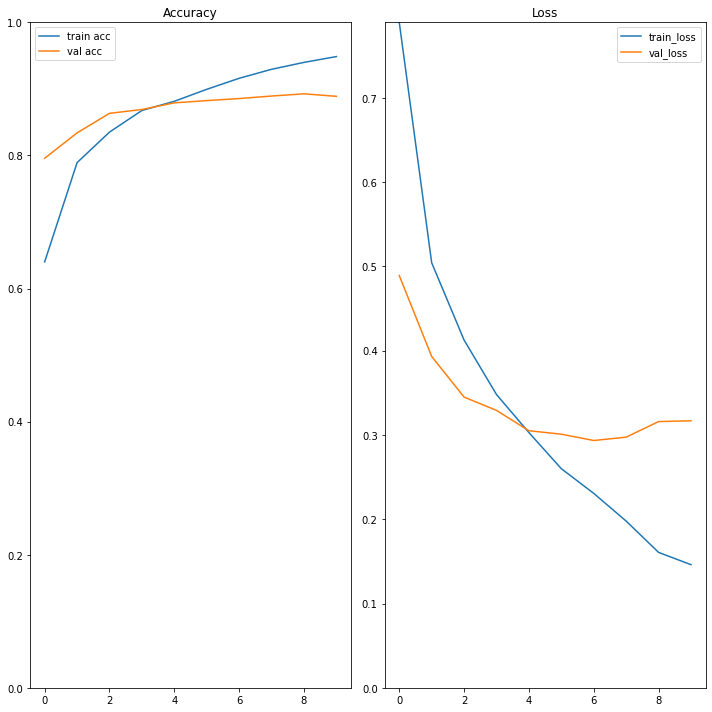

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].plot(mlp_history.history['acc'], label = 'train acc')
ax[0].plot(mlp_history.history['val_acc'], label = 'val acc')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)

ax[1].plot(mlp_history.history['loss'], label = 'train_loss')
ax[1].plot(mlp_history.history['val_loss'], label = 'val_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(mlp_history.history['loss'] + mlp_history.history['val_loss'])])

fig.tight_layout()
plt.show

In [19]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]
class_names = ['Shoe', 'Sandal', 'Boot']

141/141 [==============================] - 0s 1ms/step


In [20]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

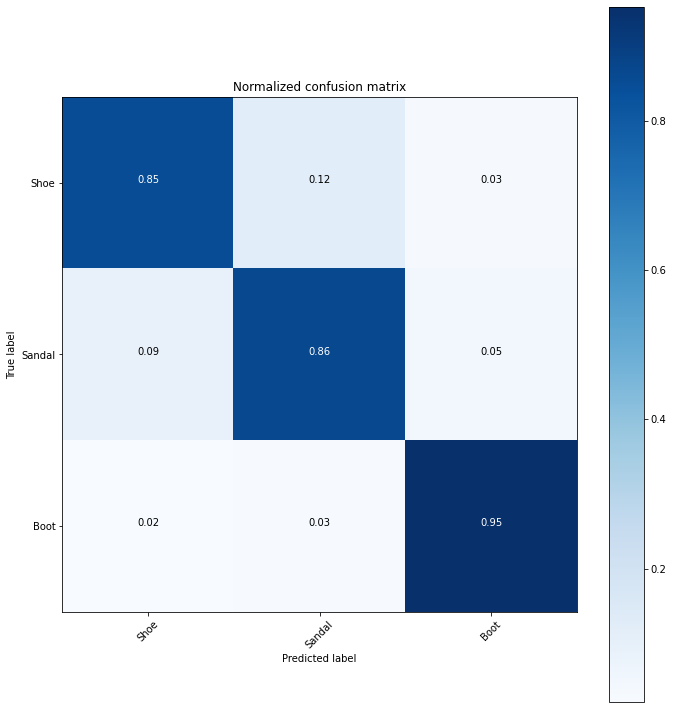

In [21]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [22]:
from sklearn.metrics import recall_score,precision_score

recall_score(y_true=y_test, y_pred=y_pred, average='weighted')



0.8888888888888888

In [23]:
precision_score(y_true=y_test, y_pred=y_pred, average='weighted')

0.8885632817374658

In [26]:
datagen  = ImageDataGenerator(validation_split=0.3)
train_set = datagen.flow_from_directory(folder_path,
                                              target_size = (28,28),
                                              color_mode = "rgb",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True, 
                                              subset='training'
                                       )
test_set = datagen.flow_from_directory(folder_path,
                                              target_size = (28,28),
                                              color_mode = "rgb",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=False, 
                                              subset='validation'
                                       )

Found 10500 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.


In [27]:
def cnn(lr = 0.001):

    modelcnn = tf.keras.models.Sequential([
                                    #Feature Extraction Layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,
                                    28,3),strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(256,activation='relu'),

                                    tf.keras.layers.Dense(3,activation='softmax')
         ])
    adam = keras.optimizers.Adam(learning_rate = lr)
 
    modelcnn.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = ['acc'])
    
    return modelcnn

modelcnn = cnn(lr = 0.0008)
modelcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [28]:
cnn_history = modelcnn.fit(train_set, validation_data=test_set, epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
83/83 [==============================] - 30s 252ms/step - loss: 5.2629 - acc: 0.4189 - val_loss: 0.9457 - val_acc: 0.5227
Epoch 2/10
83/83 [==============================] - 21s 250ms/step - loss: 0.9077 - acc: 0.5921 - val_loss: 0.6820 - val_acc: 0.7293
Epoch 3/10
83/83 [==============================] - 21s 249ms/step - loss: 0.6885 - acc: 0.7047 - val_loss: 0.5039 - val_acc: 0.8120
Epoch 4/10
83/83 [==============================] - 21s 259ms/step - loss: 0.6033 - acc: 0.7404 - val_loss: 0.4389 - val_acc: 0.8400
Epoch 5/10
83/83 [==============================] - 21s 254ms/step - loss: 0.5270 - acc: 0.7851 - val_loss: 0.3889 - val_acc: 0.8429
Epoch 6/10
83/83 [==============================] - 21s 259ms/step - loss: 0.4871 - acc: 0.8051 - val_loss: 0.3482 - val_acc: 0.8769
Epoch 7/10
83/83 [==============================] - 21s 249ms/step - loss: 0.4488 - acc: 0.8197 - val_loss: 0.3315 - val_acc: 0.8816
Epoch 8/10
83/83 [==============================] - 21s 248ms/step - 

<function matplotlib.pyplot.show(*args, **kw)>

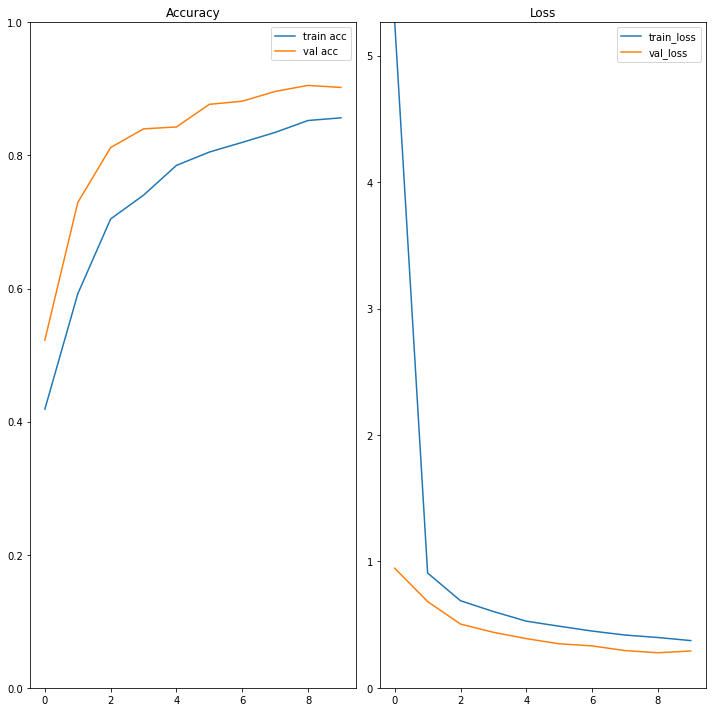

In [32]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].plot(cnn_history.history['acc'], label = 'train acc')
ax[0].plot(cnn_history.history['val_acc'], label = 'val acc')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)

ax[1].plot(cnn_history.history['loss'], label = 'train_loss')
ax[1].plot(cnn_history.history['val_loss'], label = 'val_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(cnn_history.history['loss'] + cnn_history.history['val_loss'])])

fig.tight_layout()
plt.show

In [33]:
predictions = modelcnn.predict(test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

36/36 [==============================] - 6s 171ms/step


<Figure size 432x288 with 0 Axes>

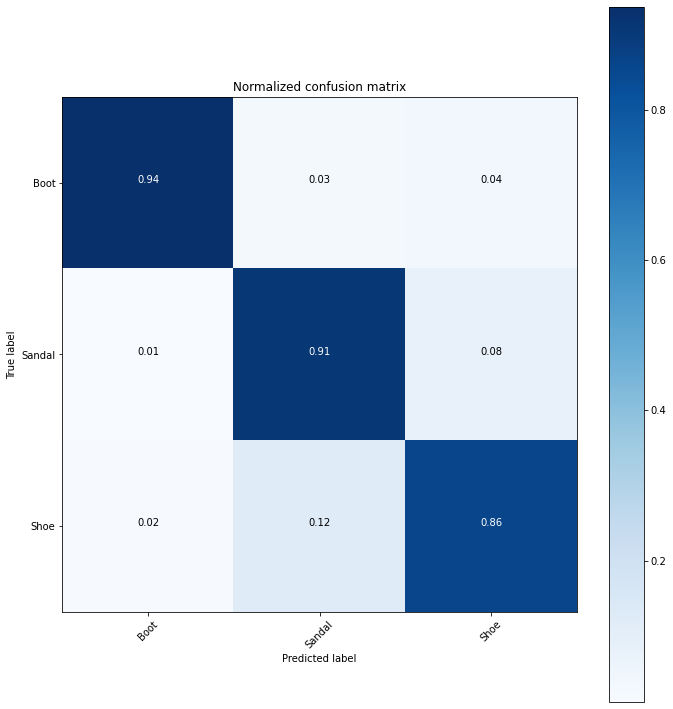

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [35]:
precision_score(y_true=y_test, y_pred=y_pred, average='weighted')


0.9036300822769827

In [36]:
recall_score(y_true=y_test, y_pred=y_pred, average='weighted')

0.9022222222222223

In [37]:
!pip install keras-cv --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.3/595.3 KB 13.0 MB/s eta 0:00:00


In [38]:

import keras_cv
def blockdrop(lr = 0.001):

    modelblockdrop = tf.keras.models.Sequential([
                                    #Feature Extraction Layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,
                                    28,3),strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    keras_cv.layers.DropBlock2D(rate=0.3, block_size=3, seed=53),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    keras_cv.layers.DropBlock2D(rate=0.3, block_size=3, seed=53),

                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    keras_cv.layers.DropBlock2D(rate=0.3, block_size=3, seed=53),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(256,activation='relu'),

                                    tf.keras.layers.Dense(3,activation='softmax')
         ])
    adam = keras.optimizers.Adam(learning_rate = lr)
 
    modelblockdrop.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = ['acc'])
    
    return modelblockdrop

modelblockdrop = blockdrop(lr = 0.0008)
modelblockdrop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 drop_block2d (DropBlock2D)  (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 drop_block2d_1 (DropBlock2D  (None, 5, 5, 64)        

In [40]:
blockdrop_history = modelblockdrop.fit(train_set, validation_data=test_set, epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
83/83 [==============================] - 32s 376ms/step - loss: 4.4264 - acc: 0.4021 - val_loss: 0.8276 - val_acc: 0.6042
Epoch 2/10
83/83 [==============================] - 21s 250ms/step - loss: 0.8869 - acc: 0.5727 - val_loss: 0.7226 - val_acc: 0.6818
Epoch 3/10
83/83 [==============================] - 21s 252ms/step - loss: 0.7806 - acc: 0.6260 - val_loss: 0.6386 - val_acc: 0.7302
Epoch 4/10
83/83 [==============================] - 23s 283ms/step - loss: 0.7006 - acc: 0.6737 - val_loss: 0.5230 - val_acc: 0.7856
Epoch 5/10
83/83 [==============================] - 22s 265ms/step - loss: 0.6493 - acc: 0.6972 - val_loss: 0.4871 - val_acc: 0.8044
Epoch 6/10
83/83 [==============================] - 21s 250ms/step - loss: 0.6064 - acc: 0.7265 - val_loss: 0.4454 - val_acc: 0.8078
Epoch 7/10
83/83 [==============================] - 21s 258ms/step - loss: 0.5828 - acc: 0.7462 - val_loss: 0.3890 - val_acc: 0.8507
Epoch 8/10
83/83 [==============================] - 21s 250ms/step - 

This technique improve the performance of the neural network.When we input an image,the information reaches every neuron.with this method we can argue that more sample that contribute to the weight calculation the better but we end up with the neuron is trying to learn a representation of everything,so in the end ,you end up with the neurons that learn something that its neighbors already know and some representation that maybe unique are very weak.beacause of the influence of the hundreds of thousands of other samples.So model can generalize better. BlockDrop is an approach that learns to dynamically choose which layers of a deep network to execute during inference so as to best reduce total computation with a little degrading val accuracy.

<function matplotlib.pyplot.show(*args, **kw)>

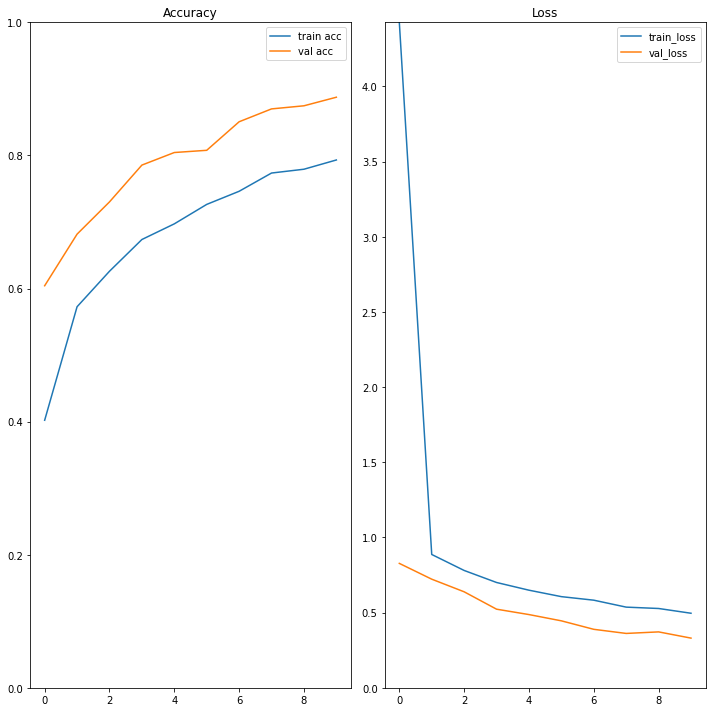

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].plot(blockdrop_history.history['acc'], label = 'train acc')
ax[0].plot(blockdrop_history.history['val_acc'], label = 'val acc')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)

ax[1].plot(blockdrop_history.history['loss'], label = 'train_loss')
ax[1].plot(blockdrop_history.history['val_loss'], label = 'val_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(blockdrop_history.history['loss'] +blockdrop_history.history['val_loss'])])

fig.tight_layout()
plt.show

In [42]:
!pip install -U keras-cv-attention-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.8/517.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.1 MB/s eta 0:00:00


In [44]:
from keras.layers import SeparableConv2D

def sep(lr = 0.001):

    modelsep = tf.keras.models.Sequential([
                        
                                    tf.keras.layers.SeparableConv2D(32,(3,3),activation = 'relu', input_shape=(28,
                                    28,3),strides=(1, 1)),
                                   
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.SeparableConv2D(64,(3,3),activation = 'relu',strides=(1, 1)),
                                    #tf.keras.layers.Conv2D(64,(3,1),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.SeparableConv2D(128,(3,3),activation = 'relu',strides=(1, 1)),
                                    #tf.keras.layers.Conv2D(128,(3,1),activation = 'relu',strides=(1, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(256,activation='relu'),

                                    tf.keras.layers.Dense(3,activation='softmax')
         ])
    adam = keras.optimizers.Adam(learning_rate = lr)
 
    modelsep.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = ['acc'])
    
    return modelsep

modelsep = sep(lr = 0.0008)
modelsep.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_3 (Separab  (None, 26, 26, 32)       155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 separable_conv2d_4 (Separab  (None, 11, 11, 64)       2400      
 leConv2D)                                                       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [46]:
sep_history = modelsep.fit(train_set, validation_data=test_set, epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
83/83 [==============================] - 22s 255ms/step - loss: 1.0754 - acc: 0.4399 - val_loss: 0.8261 - val_acc: 0.6793
Epoch 2/10
83/83 [==============================] - 21s 253ms/step - loss: 0.7529 - acc: 0.6357 - val_loss: 0.6468 - val_acc: 0.7473
Epoch 3/10
83/83 [==============================] - 21s 258ms/step - loss: 0.6637 - acc: 0.6866 - val_loss: 0.6034 - val_acc: 0.7538
Epoch 4/10
83/83 [==============================] - 25s 302ms/step - loss: 0.6015 - acc: 0.7224 - val_loss: 0.5406 - val_acc: 0.7973
Epoch 5/10
83/83 [==============================] - 21s 248ms/step - loss: 0.5563 - acc: 0.7540 - val_loss: 0.5173 - val_acc: 0.7858
Epoch 6/10
83/83 [==============================] - 21s 252ms/step - loss: 0.5304 - acc: 0.7663 - val_loss: 0.4444 - val_acc: 0.8253
Epoch 7/10
83/83 [==============================] - 21s 258ms/step - loss: 0.5082 - acc: 0.7826 - val_loss: 0.4076 - val_acc: 0.8551
Epoch 8/10
83/83 [==============================] - 26s 315ms/step - 

ADVANTAGE OF THIS METHODE  


1.Reduction of the number of parameters 


2.Reduction number of operations required and the computational cost.

3.Speed up training of convolutional neural networks without significant impact on the accuracy.
